Figure in Page 4
    - Lambda values --> what exactly is being varied?
        - lambda used to vary beta.

Look at dI and dS functions and figure out why they are behaving eradically

- What are we initializing the values to
- Graphing the average of the stochastic runnings
- Figuring out what's wrong with the stochastic model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from pprint import pprint

M = 0.01 * np.array([[19.2, 4.8, 3.0, 7.1, 3.7, 3.1, 2.3, 1.4, 1.4],
[4.8, 42.4, 6.4, 5.4, 7.5, 5.0, 1.8, 1.7, 1.7],
[3.0, 6.4, 20.7, 9.2, 7.1, 6.3, 2.0, 0.9, 0.9],
[7.1, 5.4, 9.2, 16.9, 10.1, 6.8, 3.4, 1.5, 1.5],
[3.7, 7.5, 7.1, 10.1, 13.1, 7.4, 2.6, 2.1, 2.1],
[3.1, 5.0, 6.3, 6.8, 7.4, 10.4, 3.5, 1.8, 1.8],
[2.3, 1.8, 2.0, 3.4, 2.6, 3.5, 7.5, 3.2, 3.2],
[1.4, 1.7, 0.9, 1.5, 2.1, 1.8, 3.2, 7.2, 7.2],
[1.4, 1.7, 0.9, 1.5, 2.1, 1.8, 3.2, 7.2, 7.2]]
)

d = 14

gamma = 1/d




def exp(lambda_):
    return float('inf') if lambda_ == 0 else np.random.exponential(1 / lambda_)

def dS(beta, S, N, Mi, I, i):  # M is an i by j matrix, I is a 9 length vector
    return -beta * S[i] / N * np.dot(Mi, I)

def dI(beta, S, N, Mi, I, i, gamma):  # M is an i by j matrix, I is a 9 length vector
    return beta * S[i] / N * np.dot(Mi, I) - gamma * I[i]

def dR(gamma, Ii):  # I is a 9 length vector
    return gamma * Ii

def dSI(beta, Si, N, Mi, I):
    return beta * Si / N * np.dot(Mi, I)

def dRI(gamma, Ii):
    return gamma * Ii


In [2]:
def deterministic_model_loop(L, N, i, R0, deterministic_age_group = None):
    beta = R0 * gamma / L  # L = lambda, this lambda is what is varied
    total_population = np.sum(N)
    I = i
    S = [N[j] - i[j] for j in range(len(I))] # healthy
    S = np.array(S)
    R = np.array([0] * 9)  # recovered

    #N, S, I and R are all individual arrays at this point.
    Ipophistory = []
    # print("N: ", N, "S: ", S, "I: ", I, "R: ", R)

    while np.sum(I) > 0.1:  # this should be changed to break at a set number of steps
        Snew = [S[i] + dS(beta, S, total_population, M[i], I, i) for i in range(len(S))]
        Inew = [I[i] + dI(beta, S, total_population, M[i], I, i, gamma) for i in range(len(I))]
        Rnew = [R[i] + dR(gamma, I[i]) for i in range(len(R))]
        #print("S: ", Snew, "I: ", Inew, "R: ", Rnew)
        S = Snew
        I = Inew
        R = Rnew
        Ipophistory.append(np.sum(I))
        # if deterministic_age_group != None: #meaning we have lamda = 0.1
        #    pass
    return Ipophistory

In [273]:
def amiras_stochastic_function(L, N, I, R0):
    beta = R0 * gamma / L
    population = np.sum(N)
    S = N-I
    R = np.array([1]*9)
    epsilon = 1e-10
    I_history = []
    steps = 10
    #while steps>0:
    while (np.sum(I) > 0) and (np.sum(I) < np.sum(S)):
        #get updated values for S and E
        S_outcomes = np.array([dSI(beta, S[i], population, M[i], I) for i in range(9)])
        R_outcomes = np.array([dRI(gamma, I[i]) for i in range(9)])

        #put them into one array so we can get the minimum
        A = np.concatenate((S_outcomes, R_outcomes))

        #min_val= random.randint(0, len(A)-1) #makes it super noisy and significantly increases runtime
        min_val = np.argmin(A)
        
        #stochastic SIR
        if min_val < 9: #then move person from S to I
            idx = min_val
            S[idx] -= 1
            I[idx] += 1

        else: #then move person from I to S
            idx = min_val - 9 
            I[idx] -= 1
            R[idx] += 1
        I_history.append(np.sum(I))

    return I_history

In [274]:
#lvals = [0.1, 0.125, 0.15, 0.175]
lvals = [.175, .5, .75, .75]

#lvals = [0.1, 0.2, 0.3, 0.4, 1.0, 2.0, 3.0] #has the results that look the most alike
#lvals = [0.1, 0.3, 0.4, 2.0]
deterministic_age_group = []
stochastic_age_group = []
stochastic_model_history, deterministic_model_history = [],[]
trajectories =[]
past_average = np.array([])
max_trajectory_length = 0
R0 = 5.7 # subject to change
averages = []
for l in lvals: #for each lambda value
    #initialize N and I
    N = np.array([100, 100, 100, 100, 100, 100, 100, 100, 100])
    i = np.array([10]*9)

    totalpop = np.sum(N)
    
    num_trials = 100
    all_trials = []

    for ite in range(num_trials): #take the average over 100 trials
        stochastic_model_history = amiras_stochastic_function(l, N, i, R0) #get the np.sum(I)

        all_trials.append(stochastic_model_history)
        #to keep track of trials
        max_trajectory_length = max(max_trajectory_length, len(stochastic_model_history)) #used for padding purpose



        N = np.array([100, 100, 100, 100, 100, 100, 100, 100, 100])
        i = np.array([10]*9)
    

    padded_trajectories = [np.pad(traj, (0, max_trajectory_length - len(traj)), 'constant') for traj in all_trials]
    average_trajectory = np.mean(padded_trajectories, axis=0)
    # assert(np.array_equal(past_average, average_trajectory) == False)
    past_average = average_trajectory
    trajectories.append(average_trajectory)

    # if l == 0.1:
    #     stochastic_age_group = average_trajectory


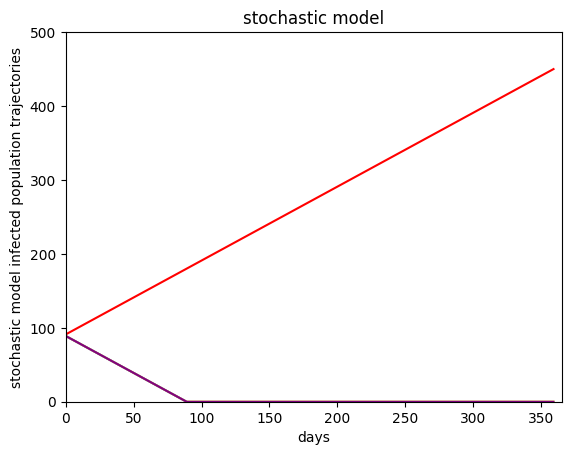

In [275]:
plt.title(f"stochastic model")
plt.xlabel("days")
plt.ylabel("stochastic model infected population trajectories")
plt.xlim([0, 365])
plt.ylim([0, 500])
plt.plot(trajectories[0], c = "blue")
plt.plot(trajectories[1], c = "red")
plt.plot(trajectories[2], c = "yellow")
plt.plot(trajectories[3], c = "purple")

Deterministic Modeling Graph for each individual age group

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[89. 88. 87. 86. 85. 84. 83. 82. 81. 80. 79. 78. 77. 76. 75. 74. 73. 72.
 71. 70. 69. 68. 67. 66. 65. 64. 63. 62. 61. 60. 59. 58. 57. 56. 55. 54.
 53. 52. 51. 50. 49. 48. 47. 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36.
 35. 34. 33. 32. 31. 30. 29. 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18.
 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]


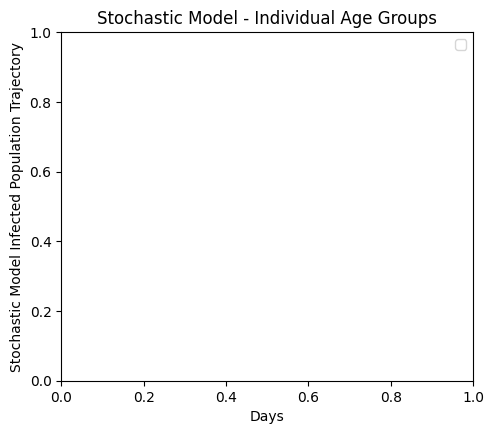

In [219]:
# ... (previous code)

plt.figure(figsize=(12, 6))

# Plotting for Stochastic Model
plt.subplot(1, 2, 1)
plt.tight_layout(pad=8)
plt.title("Stochastic Model - Individual Age Groups")
plt.xlabel("Days")
plt.ylabel("Stochastic Model Infected Population Trajectory")
plt.legend()

# # Plotting for Deterministic Model - Individual Age Groups
# plt.subplot(1, 2, 2)
# plt.title("Deterministic Model - Individual Age Groups")
# plt.xlabel("Days")
# plt.ylabel("Deterministic Model Infected Population Trajectory")


for j in range(9):
    #det_group_vals = []
    stoch_group_vals = []
    # for i in range(j, len(deterministic_age_group)-6, 9):
    #     det_group_vals.append(deterministic_age_group[i])
    
    for i in range(j, len(stochastic_age_group)-6, 9):
        stoch_group_vals.append(stochastic_age_group[i])

    #plt.plot(det_group_vals)

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.show()


In [7]:
#where i = the ith age range
'''
S(t)→ I(t)→ R(t)
I(t)→ H(t)→ C(t)
I(t) → M(t)
'''

h = np.array([.1, .3, 1.2, 3.2, 4.9, 10.2, 16.6, 24.3, 27.3]) / 100
c = np.array([5.0, 5.0, 5.0, 5.0, 6.3, 12.2, 27.4, 43.2, 70.9]) / 100
m = np.array([0.002, .006, .03, .08, .15, .6, 2.2, 5.1, 9.3]) / 100
d2 = np.array([1 / 10.15, 1 / 10.15, 1 / 10.15, 1 / 10.15, 1 / 14.67, 1 / 15.12, 1 / 16.6, 1 / 16.6, 1 / 16.6])

# h = [.1, .3, 1.2, 3.2, 4.9, 10.2, 16.6, 24.3, 27.3]
# c = [5.0, 5.0, 5.0, 5.0, 6.3, 12.2, 27.4, 43.2, 70.9]
# m = [0.002, .006, .03, .08, .15, .6, 2.2, 5.1, 9.3]

def dH(gamma, Ii, hi):
  return gamma * hi * Ii

# def dC(gamma, Ii, hi, ci):
#   return gamma * hi * Ii * ci

def dC(I, C, i):
    ret = gamma * h[i] * I[i] * c[i] - d2[i] * C[i]
    return ret

def dM(gamma, mi, Ii):
  return gamma * mi * Ii


In [8]:
def stochastic_function_hcm(I, H, C, Mo, h, c, m):
    hospital_hist = []
    icu_hist = []
    mortality_hist = []

    while np.sum(I) > 0: 
        
        h_outcomes = np.array([dH(gamma, I[i], h[i]) for i in range(9)])
        c_outcomes = np.array([dC(I, C, i) for i in range(9)])
        m_outcomes = np.array([dM(gamma, m[i], I[i]) for i in range(9)])

        min_val = random.randint(0, len(np.concatenate((h_outcomes, np.concatenate((c_outcomes, m_outcomes)))))-1)
        
        if min_val < 9: #infected to hospitalized
            I[min_val] -= 1
            H[min_val] += 1
        elif min_val >= 9 and min_val < 18:
            H[min_val % 9] -= 1
            C[min_val % 9] += 1
        else:
            I[min_val % 9] -= 1
            Mo[min_val % 9] += 1
    
        hospital_hist.append(np.sum(H))
        icu_hist.append(np.sum(C))
        mortality_hist.append(np.sum(Mo)) 
        if(np.sum(I) < 0):
            print("I sum less than 0")

    return hospital_hist, icu_hist, mortality_hist

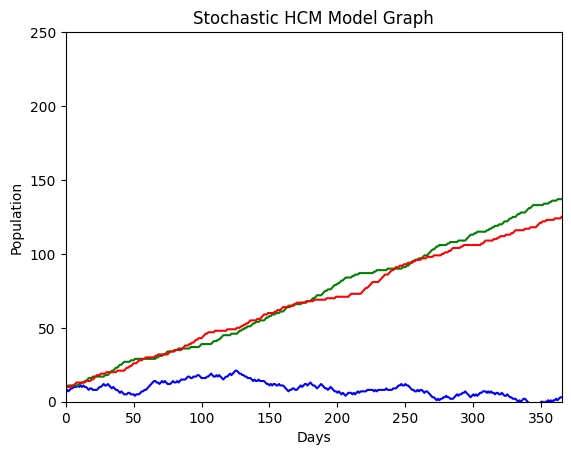

In [9]:
all_hosp_trials = []
all_icu_trials = []
all_mort_trials = []

h = np.array([.1, .3, 1.2, 3.2, 4.9, 10.2, 16.6, 24.3, 27.3]) / 100
c = np.array([5.0, 5.0, 5.0, 5.0, 6.3, 12.2, 27.4, 43.2, 70.9]) / 100
m = np.array([0.002, .006, .03, .08, .15, .6, 2.2, 5.1, 9.3]) / 100

H = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])
C = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])
Mo = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])
I = np.array([100, 100, 100, 100, 100, 100, 100, 100, 100])


for k in range(100): #100 trials
    hosp_hist, icu_hist, mort_hist = stochastic_function_hcm(I, H, C, Mo, h, c, m)
    all_hosp_trials.append(hosp_hist)
    all_icu_trials.append(icu_hist)
    all_mort_trials.append(mort_hist)


for hosp_hist in all_hosp_trials:
    plt.plot(hosp_hist, color='blue')

for icu_hist in all_icu_trials:
    plt.plot(icu_hist, color='green')

for mort_hist in all_mort_trials:
    plt.plot(mort_hist, color='red')

plt.xlabel('Days')
plt.xlim([0, 365])
plt.ylim([0, 250])
plt.ylabel('Population')
plt.title('Stochastic HCM Model Graph')
plt.show()


CODE FOR EXTENSION
Deterministic Model - from Alex

In [10]:
rho = [1] * 9

V = np.array([0.735, 0.776, 0.791, 0.791, 0.791, 0.791, 0.944, 0.944, 0.944])

K = 0.67

J = 0.236

W = 0.143

P = np.array([0.037, 0.037, 0.012, 0.022, 0.022, 0.029, 0.029, 0.075, 0.075])

U = np.array([0.404, 0.404, 0.404, 0.404, 0.404, 0.404, 0.631, 0.631, 0.631]) # subject to change

h_ = np.array([.1, .3, 1.2, 3.2, 4.9, 10.2, 16.6, 24.3, 27.3]) / 100
c_ = np.array([5.0, 5.0, 5.0, 5.0, 6.3, 12.2, 27.4, 43.2, 70.9]) / 100
m_ = np.array([0.002, .006, .03, .08, .15, .6, 2.2, 5.1, 9.3]) / 100

hi = np.array([0.032, 0.024, 0.456, 1.216, 1.862, 3.876, 6.308, 9.234, 10.374]) / 100
ci = np.array([5.0, 0.2, 1.55, 1.55, 1.953, 3.782, 8.494, 13.392, 21.979]) / 100
mi = np.array([0.002, 0.006, 0.00312, 0.00832, 0.0156, 0.0624, 0.2288, 0.5304, 0.9672]) / 100

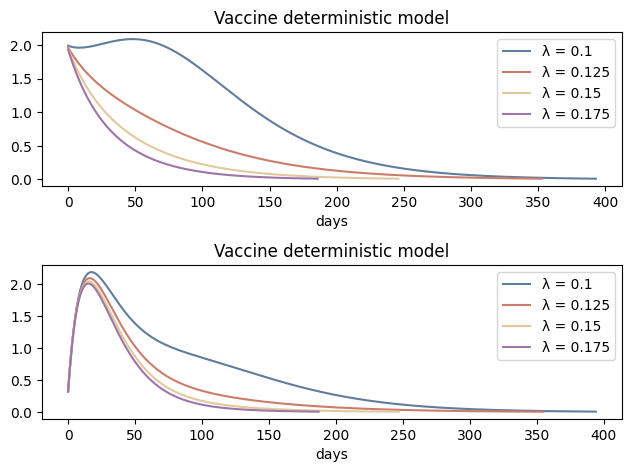

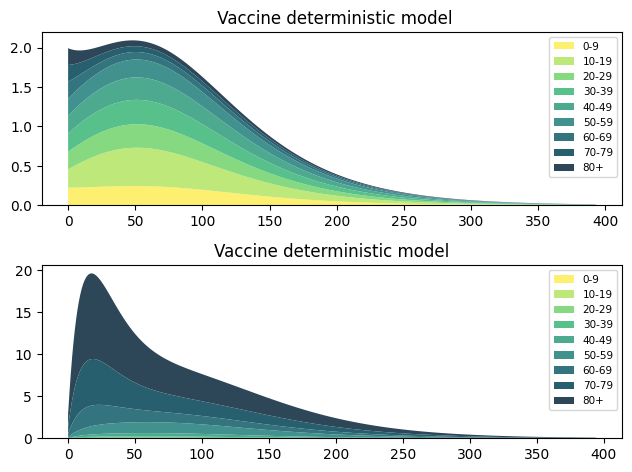

In [11]:
# Vaccine extension
Original = False
Vaccine = True
reinfection = False
Vaccine_reinfection = False
cutoff = 0.1
maxiters = 500

def dSvi(beta, Sv, N, I, i):
    return -beta * J * Sv[i] / N * np.dot(M[i], I)


def dSuvi(beta, Suv, N, I, i):
    return -beta * K * Suv[i] / N * np.dot(M[i], I)


def dIvi(beta, Sv, N, I, Iv, i):
    return beta * J * Sv[i] / N * np.dot(M[i], I) - gamma * Iv[i]


def dIuvi(beta, Suv, N, I, Iuv, i):
    return beta * K * Suv[i] / N * np.dot(M[i], I) - gamma * Iuv[i]


def dRvi(Ivi):
    return gamma * (Ivi)


def dRuvi(Iuvi):
    return gamma * (Iuvi)


def dHi(Iv, Iuv, i):
    return gamma * (h_[i] * Iuv[i] + hi[i] * Iv[i])


def dCi(Iv, Iuv, Ci, i):
    ret = gamma * (c_[i] * h_[i] * Iuv[i] + ci[i] * hi[i] * Iv[i]) - d2[i] * Ci[i]
    return ret


def dMi(Iv, Iuv, i):
    return gamma * (m_[i] * Iuv[i] + mi[i] * Iv[i])

if Vaccine:
    def vax_deterministic_model_loop(L, N, init):
        beta = R0 * gamma / L  # L = lambda, this lambda is what is varied
        total_population = np.sum(N)
        Iv = init
        Iuv = init
        I = np.add(Iv, Iuv)
        S = [N[j] - init[j] for j in range(len(Iv))]  # healthy
        S = np.array(S)
        Sv = S * V
        Suv = S * ([1] * 9 - V)
        Rv = np.array([0] * 9)
        Ruv = np.array([0] * 9)
        Hi = np.array([0] * 9)
        Ci = np.array([0] * 9)
        Mi = np.array([0] * 9)
        # N, S, I and R are all individual arrays at this point.
        Shistory, Svhistory, Suvhistory, Ihistory, Ivhistory, Iuvhistory, Rhistory, Rvhistory, Ruvhistory = [], [], [], [], [], [], [], [], []
        Hhistory, Chistory, Mhistory = [], [], []
        Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory = [], [], [], []
        max = 0
        while np.sum(Iv) + np.sum(Iuv) + np.sum(Ci) > cutoff and max < maxiters:  # this should be changed to break at a set number of steps
            max += 1
            Svnew = [Sv[i] + dSvi(beta, Sv, total_population, I, i) for i in range(len(S))]
            Suvnew = [Suv[i] + dSuvi(beta, Suv, total_population, I, i) for i in range(len(S))]
            Ivnew = [Iv[i] + dIvi(beta, Sv, total_population, I, Iv, i) for i in range(len(I))]
            Iuvnew = [Iuv[i] + dIuvi(beta, Suv, total_population, I, Iuv, i) for i in range(len(I))]
            Rvnew = [Rv[i] + dRvi(Iv[i]) for i in range(len(Rv))]
            Ruvnew = [Ruv[i] + dRuvi(Iuv[i]) for i in range(len(Ruv))]
            Hi = [Hi[i] + dHi(Iv, Iuv, i) for i in range(len(Hi))]
            Ci = [Ci[i] + dCi(Iv, Iuv, Ci, i) for i in range(len(Ci))]
            Mi = [Mi[i] + dMi(Iv, Iuv, i) for i in range(len(Mi))]
            Sv = Svnew
            Suv = Suvnew
            Iv = Ivnew
            Iuv = Iuvnew
            Rv = Rvnew
            Ruv = Ruvnew
            I = np.add(Iv, Iuv)
            S = np.add(Suv, Sv)
            R = np.add(Ruv, Rv)
            Hhistory.append(np.sum(Hi))
            Chistory.append(np.sum(Ci))
            Mhistory.append(np.sum(Mi))
            Shistory.append(np.sum(S))
            Svhistory.append(np.sum(Sv))
            Suvhistory.append(np.sum(Suv))
            Ihistory.append(np.sum(I))
            Ivhistory.append(np.sum(Iv))
            Iuvhistory.append(np.sum(Iuv))
            Rhistory.append(np.sum(R))
            if np.sum(I) > cutoff:
                Tophistory.append((np.divide(np.sum(I), np.sum(N))) * 10 ** 2)
                fig8Tophistory.append((np.divide(I, np.sum(N))) * 10 ** 2)
            Bottomhistory.append(np.divide(np.sum(Ci), np.sum(N)) * 10 ** 4)
            fig8Bottomhistory.append(np.divide(Ci, N) * 10 ** 4)
        return Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Svhistory, Suvhistory, Ihistory, Ivhistory, Iuvhistory, Rhistory, Rvhistory, Ruvhistory


    lvals = [0.1, 0.125, 0.15, 0.175, 0.2]
    vax_deterministic_model_history = []

    for l in lvals:
        N_ = N.copy() * rho  # subject to change
        i = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])  # subject to change
        totalpop = np.sum(N_)
        Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Svhistory, Suvhistory, Ihistory, Ivhistory, Iuvhistory, Rhistory, Rvhistory, Ruvhistory = vax_deterministic_model_loop(
            l, N_, i)

        vax_deterministic_model_history.append(
            (Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Svhistory, Suvhistory, Ihistory,
             Ivhistory, Iuvhistory, Rhistory, Rvhistory, Ruvhistory))  # N and I are both arrays

    vax_Tophistory = [i[0] for i in vax_deterministic_model_history]
    vax_Bottomhistory = [i[1] for i in vax_deterministic_model_history]
    vax_fig8Tophistory = [i[2] for i in vax_deterministic_model_history]
    vax_fig8Bottomhistory = [i[3] for i in vax_deterministic_model_history]

    # Figure 3
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.title(f"Vaccine deterministic model")
    plt.xlabel("days")
    # plt.ylabel("deterministic model infected population trajectory")
    color_map = [(97, 125, 156), (203, 125, 107), (226, 201, 157), (157, 117, 168)]
    hex_map = ['#%02x%02x%02x' % (rgb_code[0], rgb_code[1], rgb_code[2]) for rgb_code in color_map]
    plt.plot(vax_Tophistory[0], color=hex_map[0], label="λ = 0.1")
    plt.plot(vax_Tophistory[1], color=hex_map[1], label="λ = 0.125")
    plt.plot(vax_Tophistory[2], color=hex_map[2], label="λ = 0.15")
    plt.plot(vax_Tophistory[3], color=hex_map[3], label="λ = 0.175")
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.title(f"Vaccine deterministic model")
    plt.xlabel("days")
    # plt.ylabel("deterministic model infected population trajectory")

    plt.plot(vax_Bottomhistory[0], color=hex_map[0], label="λ = 0.1")
    plt.plot(vax_Bottomhistory[1], color=hex_map[1], label="λ = 0.125")
    plt.plot(vax_Bottomhistory[2], color=hex_map[2], label="λ = 0.15")
    plt.plot(vax_Bottomhistory[3], color=hex_map[3], label="λ = 0.175")
    plt.tight_layout(pad=1.0)
    plt.legend()
    plt.show()

    # Figure 8

    vax_fig8Tophistory, vax_fig8Bottomhistory = vax_fig8Tophistory[0], vax_fig8Bottomhistory[0]
    vax_topvstack = []
    vax_bottomvstack = []
    for i in range(len(vax_fig8Tophistory[0])):
        vax_topvstack.append([arr[i] for arr in vax_fig8Tophistory])
    for i in range(len(vax_fig8Bottomhistory[0])):
        vax_bottomvstack.append([arr[i] for arr in vax_fig8Bottomhistory])

    lbls = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
    color_map = [(253, 239, 111), (191, 232, 122), (134, 217, 128), (88, 192, 138), (77, 170, 143), (65, 145, 143),
                 (51, 116, 127), (40, 95, 111), (45, 71, 89)]
    hex_map = ['#%02x%02x%02x' % (rgb_code[0], rgb_code[1], rgb_code[2]) for rgb_code in color_map]
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.title(f" Vaccine deterministic model")
    plt.stackplot(np.linspace(0, len(vax_fig8Tophistory) - 1, len(vax_fig8Tophistory)), vax_topvstack[0], vax_topvstack[1],
                  vax_topvstack[2],
                  vax_topvstack[3], vax_topvstack[4], vax_topvstack[5], vax_topvstack[6], vax_topvstack[7],
                  vax_topvstack[8], labels=lbls,
                  colors=hex_map)
    plt.legend(fontsize=7.5)
    plt.subplot(2, 1, 2)
    plt.title(f"Vaccine deterministic model")
    plt.stackplot(np.linspace(0, len(vax_fig8Bottomhistory) - 1, len(vax_fig8Bottomhistory)), vax_bottomvstack[0],
                  vax_bottomvstack[1],
                  vax_bottomvstack[2], vax_bottomvstack[3], vax_bottomvstack[4], vax_bottomvstack[5], vax_bottomvstack[6],
                  vax_bottomvstack[7],
                  vax_bottomvstack[8], labels=lbls, colors=hex_map)
    plt.legend(fontsize=7.5)
    plt.tight_layout(pad=1.0)
    plt.show()


# Reinfection extension

def dS1r(beta, S1, N, I, i):
    return -beta * K * S1[i] / N * np.dot(M[i], I)


def dIr(beta, S1, S2, N, I, i):
    ret = beta / N * (K * S1[i] + S2[i]) * np.dot(M[i], I) - gamma * I[i]
    return ret

def dRr(Ri, Ii):
        return gamma * (Ii) - W * Ri

def dS2r(beta, S2, N, I, R, i):
    return -beta * S2[i] / N * np.dot(M[i], I) + W * R[i]


if reinfection:

    def reinf_deterministic_model_loop(L, N, init):
        beta = R0 * gamma / L  # L = lambda, this lambda is what is varied
        total_population = np.sum(N)
        I = init
        S = [N[j] - init[j] for j in range(len(I))]  # healthy
        S1 = np.array(S)
        S2 = np.array([0] * 9)
        R = np.array([0] * 9)
        H = np.array([0] * 9)
        C = np.array([0] * 9)
        Mort = np.array([0] * 9)
        # N, S, I and R are all individual arrays at this point.
        Shistory, Ihistory, Rhistory, = [], [], []
        Hhistory, Chistory, Mhistory = [], [], []
        Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory = [], [], [], []
        max = 0
        while np.sum(I) + np.sum(C) > cutoff and max < maxiters:  # this should be changed to break at a set number of steps
            max += 1
            S1new = [S1[j] + dS1r(beta, S1, total_population, I, j) for j in range(len(S))] # dS1r(beta, S1, N, I, i):
            S2new = [S2[j] + dS2r(beta, S2, total_population, I, R, j) for j in range(len(S))] # dS2r(beta, S2, N, I, R, i):
            Inew = [I[j] + dIr(beta, S1, S2, total_population, I, j) for j in range(len(I))] # (beta, S1, S2, N, I, i):
            Rnew = [R[j] + dRr(R[j], I[j]) for j in range(len(R))] # dRr(Ri, Ii):
            H = [H[j] + dH(I, j) for j in range(len(H))]
            C = [C[j] + dC(I, C, j) for j in range(len(C))]
            Mort = [Mort[j] + dM(I, j) for j in range(len(M))]
            S1 = np.array(S1new)
            S2 = np.array(S2new)
            I = np.array(Inew)
            R = np.array(Rnew)
            Hhistory.append(np.sum(H))
            Chistory.append(np.sum(C))
            Mhistory.append(np.sum(Mort))
            Shistory.append(np.sum(np.add(S1, S2)))
            Ihistory.append(np.sum(I))
            Rhistory.append(np.sum(R))
            if np.sum(I) > cutoff:
                Tophistory.append((np.divide(np.sum(I), np.sum(N))) * 10 ** 2)
                fig8Tophistory.append((np.divide(I, np.sum(N))) * 10 ** 2)
            Bottomhistory.append(np.divide(np.sum(C), np.sum(N)) * 10 ** 4)
            fig8Bottomhistory.append(np.divide(C, N) * 10 ** 4)
        return Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Ihistory, Rhistory

    lvals = [0.1, 0.125, 0.15, 0.175, 0.2]
    reinf_deterministic_model_history = []

    for l in lvals:
        N_ = N.copy() * rho  # subject to change
        i = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])  # subject to change
        totalpop = np.sum(N_)
        Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Ihistory, Rhistory = reinf_deterministic_model_loop(
            l, N_, i)

        reinf_deterministic_model_history.append(
            (Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Ihistory, Rhistory))  # N and I are both arrays

    reinf_Tophistory = [i[0] for i in reinf_deterministic_model_history]
    reinf_Bottomhistory = [i[1] for i in reinf_deterministic_model_history]
    reinf_fig8Tophistory = [i[2] for i in reinf_deterministic_model_history]
    reinf_fig8Bottomhistory = [i[3] for i in reinf_deterministic_model_history]

    # Figure 3
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.title(f"Reinfection deterministic model")
    plt.xlabel("days")
    # plt.ylabel("deterministic model infected population trajectory")
    color_map = [(97, 125, 156), (203, 125, 107), (226, 201, 157), (157, 117, 168)]
    hex_map = ['#%02x%02x%02x' % (rgb_code[0], rgb_code[1], rgb_code[2]) for rgb_code in color_map]
    plt.plot(reinf_Tophistory[0], color=hex_map[0], label="λ = 0.1")
    plt.plot(reinf_Tophistory[1], color=hex_map[1], label="λ = 0.125")
    plt.plot(reinf_Tophistory[2], color=hex_map[2], label="λ = 0.15")
    plt.plot(reinf_Tophistory[3], color=hex_map[3], label="λ = 0.175")
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.title(f"Reinfection deterministic model")
    plt.xlabel("days")
    # plt.ylabel("deterministic model infected population trajectory")

    plt.plot(reinf_Bottomhistory[0], color=hex_map[0], label="λ = 0.1")
    plt.plot(reinf_Bottomhistory[1], color=hex_map[1], label="λ = 0.125")
    plt.plot(reinf_Bottomhistory[2], color=hex_map[2], label="λ = 0.15")
    plt.plot(reinf_Bottomhistory[3], color=hex_map[3], label="λ = 0.175")
    plt.tight_layout(pad=1.0)
    plt.legend()
    plt.show()

    # Figure 8

    reinf_fig8Tophistory, reinf_fig8Bottomhistory = reinf_fig8Tophistory[0], reinf_fig8Bottomhistory[0]
    reinf_topvstack = []
    reinf_bottomvstack = []
    for i in range(len(reinf_fig8Tophistory[0])):
        reinf_topvstack.append([arr[i] for arr in reinf_fig8Tophistory])
    for i in range(len(reinf_fig8Bottomhistory[0])):
        reinf_bottomvstack.append([arr[i] for arr in reinf_fig8Bottomhistory])

    lbls = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
    color_map = [(253, 239, 111), (191, 232, 122), (134, 217, 128), (88, 192, 138), (77, 170, 143), (65, 145, 143),
                 (51, 116, 127), (40, 95, 111), (45, 71, 89)]
    hex_map = ['#%02x%02x%02x' % (rgb_code[0], rgb_code[1], rgb_code[2]) for rgb_code in color_map]
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.title(f"Reinfection deterministic model")
    plt.stackplot(np.linspace(0, len(reinf_fig8Tophistory) - 1, len(reinf_fig8Tophistory)), reinf_topvstack[0],
                  reinf_topvstack[1], reinf_topvstack[2],
                  reinf_topvstack[3], reinf_topvstack[4], reinf_topvstack[5], reinf_topvstack[6], reinf_topvstack[7],
                  reinf_topvstack[8], labels=lbls,
                  colors=hex_map)
    plt.legend(fontsize=7.5)
    plt.subplot(2, 1, 2)
    plt.title(f"Reinfection deterministic model")
    plt.stackplot(np.linspace(0, len(reinf_fig8Bottomhistory) - 1, len(reinf_fig8Bottomhistory)), reinf_bottomvstack[0],
                  reinf_bottomvstack[1],
                  reinf_bottomvstack[2], reinf_bottomvstack[3], reinf_bottomvstack[4], reinf_bottomvstack[5],
                  reinf_bottomvstack[6], reinf_bottomvstack[7],
                  reinf_bottomvstack[8], labels=lbls, colors=hex_map)
    plt.legend(fontsize=7.5)
    plt.tight_layout(pad=1.0)
    plt.show()

if Vaccine_reinfection:

    def dS1vi(beta, S1v, N, I, i):
        ret = -beta * J * S1v[i] / N * np.dot(M[i], I)
        return ret


    def dS1uvi(beta, S1uv, N, I, i):
        ret = -beta * S1uv[i] / N * np.dot(M[i], I)
        return ret


    def dS2vi(beta, S2v, Rv, N, I, i):
        ret = -beta * S2v[i] / N * np.dot(M[i], I) + U[i] * Rv[i]
        return ret


    def dS2uvi(beta, S2uv, Ruv, N, I, i):
        ret = -beta * S2uv[i] / N * np.dot(M[i], I) + W * Ruv[i]
        return ret


    def dIvi(beta, S1v, S2v, N, I, Iv, i):
        ret = beta / N * ( J * S1v[i] + S2v[i]) * np.dot(M[i], I) - gamma * Iv[i]
        return ret


    def dIuvi(beta, S1uv, S2uv, N, I, Iuv, i):
        ret = beta / N * (K * S1uv[i] + S2uv[i]) * np.dot(M[i], I) - gamma * Iuv[i]
        return ret


    def dRvi(Iv, Rv, i):
        ret = gamma * Iv[i] - U[i] * Rv[i]
        return ret


    def dRuvi(Iuv, Ruv, i):
        ret = gamma * Iuv[i] - W * Ruv[i]
        return ret

    def vax_reinf_deterministic_model_loop(L, N, init):
        beta = R0 * gamma / L  # L = lambda, this lambda is what is varied
        total_population = np.sum(N)
        Iv = init
        Iuv = init
        I = np.add(Iv, Iuv)
        S = [N[j] - init[j] for j in range(len(Iv))]  # healthy
        S = np.array(S)
        S1v = P * (S * V)
        S1uv = P * (S * (1 - V))
        S2v = (1 - P) * (S * V)
        S2uv = (1 - P) * (S * (1-V))
        Rv = np.array([0] * 9)
        Ruv = np.array([0] * 9)
        Hi = np.array([0] * 9)
        Ci = np.array([0] * 9)
        Mi = np.array([0] * 9)
        # N, S, I and R are all individual arrays at this point.
        Shistory, Svhistory, Suvhistory, Ihistory, Ivhistory, Iuvhistory, Rhistory, Rvhistory, Ruvhistory = [], [], [], [], [], [], [], [], []
        Hhistory, Chistory, Mhistory = [], [], []
        Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory = [], [], [], []
        max = 0
        while np.sum(Iv) + np.sum(Iuv) + np.sum(Ci) > cutoff and max < maxiters:  # this should be changed to break at a set number of steps
            max += 1
            S1vnew = [S1v[j] + dS1vi(beta, S1v, total_population, I, j) for j in range(len(S))]
            S1uvnew = [S1uv[j] + dS1uvi(beta, S1uv, total_population, I, j) for j in range(len(S))]
            S2vnew = [S2v[j] + dS2vi(beta, S2v, Rv, total_population, I, j) for j in range(len(S))]
            S2uvnew = [S2uv[j] + dS2uvi(beta, S2uv, Ruv, total_population, I, j) for j in range(len(S))]
            Ivnew = [Iv[j] + dIvi(beta, S1v, S2v, total_population, I, Iv, j) for j in range(len(I))]
            Iuvnew = [Iuv[j] + dIuvi(beta, S1uv, S2uv, total_population, I, Iuv, j) for j in range(len(I))]
            Rvnew = [Rv[j] + dRvi(Iv, Rv, j) for j in range(len(Rv))]
            Ruvnew = [Ruv[j] + dRuvi(Iuv, Ruv, j) for j in range(len(Ruv))]
            Hi = [Hi[j] + dHi(Iv, Iuv, j) for j in range(len(Hi))]
            Ci = [Ci[j] + dCi(Iv, Iuv, Ci, j) for j in range(len(Ci))]
            Mi = [Mi[j] + dMi(Iv, Iuv, j) for j in range(len(Mi))]
            S1v = S1vnew
            S1uv = S1uvnew
            S2v = S2vnew
            S2uv = S2uvnew
            Iv = Ivnew
            Iuv = Iuvnew
            Rv = Rvnew
            Ruv = Ruvnew
            I = np.add(Iv, Iuv)
            S = np.add(S1uv, np.add(S1v, np.add(S2uv, S2v)))
            R = np.add(Ruv, Rv)
            Hhistory.append(np.sum(Hi))
            Chistory.append(np.sum(Ci))
            Mhistory.append(np.sum(Mi))
            Shistory.append(np.sum(S))
            Svhistory.append(np.sum(np.add(S1v, S2v)))
            Suvhistory.append(np.sum(np.add(S1uv, S2uv)))
            Ihistory.append(np.sum(I))
            Ivhistory.append(np.sum(Iv))
            Iuvhistory.append(np.sum(Iuv))
            Rhistory.append(np.sum(R))
            if np.sum(I) > cutoff:
                Tophistory.append((np.divide(np.sum(I), np.sum(N))) * 10 ** 2)
                fig8Tophistory.append((np.divide(I, np.sum(N))) * 10 ** 2)
            Bottomhistory.append(np.divide(np.sum(Ci), np.sum(N)) * 10 ** 4)
            fig8Bottomhistory.append(np.divide(Ci, N) * 10 ** 4)
        return Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Svhistory, Suvhistory, Ihistory, Ivhistory, Iuvhistory, Rhistory, Rvhistory, Ruvhistory


    lvals = [0.1, 0.125, 0.15, 0.175, 0.2]
    vax_reinf_deterministic_model_history = []

    for l in lvals:
        N_ = N.copy() * rho  # subject to change
        i = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])  # subject to change
        totalpop = np.sum(N_)
        Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Svhistory, Suvhistory, Ihistory, Ivhistory, Iuvhistory, Rhistory, Rvhistory, Ruvhistory = vax_reinf_deterministic_model_loop(
            l, N_, i)

        vax_reinf_deterministic_model_history.append(
            (Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Svhistory, Suvhistory, Ihistory, Ivhistory, Iuvhistory, Rhistory, Rvhistory, Ruvhistory))  # N and I are both arrays

    vax_reinf_Tophistory = [i[0] for i in vax_reinf_deterministic_model_history]
    vax_reinf_Bottomhistory = [i[1] for i in vax_reinf_deterministic_model_history]
    vax_reinf_fig8Tophistory = [i[2] for i in vax_reinf_deterministic_model_history]
    vax_reinf_fig8Bottomhistory = [i[3] for i in vax_reinf_deterministic_model_history]

    # Figure 3
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.title(f"Vaccine and Reinfection deterministic model")
    plt.xlabel("days")
    # plt.ylabel("deterministic model infected population trajectory")
    color_map = [(97, 125, 156), (203, 125, 107), (226, 201, 157), (157, 117, 168)]
    hex_map = ['#%02x%02x%02x' % (rgb_code[0], rgb_code[1], rgb_code[2]) for rgb_code in color_map]
    plt.plot(vax_reinf_Tophistory[0], color=hex_map[0], label="λ = 0.1")
    plt.plot(vax_reinf_Tophistory[1], color=hex_map[1], label="λ = 0.125")
    plt.plot(vax_reinf_Tophistory[2], color=hex_map[2], label="λ = 0.15")
    plt.plot(vax_reinf_Tophistory[3], color=hex_map[3], label="λ = 0.175")
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.title(f"Vaccine and Reinfection deterministic model")
    plt.xlabel("days")
    # plt.ylabel("deterministic model infected population trajectory")

    plt.plot(vax_reinf_Bottomhistory[0], color=hex_map[0], label="λ = 0.1")
    plt.plot(vax_reinf_Bottomhistory[1], color=hex_map[1], label="λ = 0.125")
    plt.plot(vax_reinf_Bottomhistory[2], color=hex_map[2], label="λ = 0.15")
    plt.plot(vax_reinf_Bottomhistory[3], color=hex_map[3], label="λ = 0.175")
    plt.tight_layout(pad=1.0)
    plt.legend()
    plt.show()

    # Figure 8

    vax_reinf_fig8Tophistory, vax_reinf_fig8Bottomhistory = vax_reinf_fig8Tophistory[0], vax_reinf_fig8Bottomhistory[0]
    vax_reinf_topvstack = []
    vax_reinf_bottomvstack = []
    for i in range(len(vax_reinf_fig8Tophistory[0])):
        vax_reinf_topvstack.append([arr[i] for arr in vax_reinf_fig8Tophistory])
    for i in range(len(vax_reinf_fig8Bottomhistory[0])):
        vax_reinf_bottomvstack.append([arr[i] for arr in vax_reinf_fig8Bottomhistory])

    lbls = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
    color_map = [(253, 239, 111), (191, 232, 122), (134, 217, 128), (88, 192, 138), (77, 170, 143), (65, 145, 143),
                 (51, 116, 127), (40, 95, 111), (45, 71, 89)]
    hex_map = ['#%02x%02x%02x' % (rgb_code[0], rgb_code[1], rgb_code[2]) for rgb_code in color_map]
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.title(f"Vaccine and Reinfection deterministic model")
    plt.stackplot(np.linspace(0, len(vax_reinf_fig8Tophistory) - 1, len(vax_reinf_fig8Tophistory)), vax_reinf_topvstack[0],
                  vax_reinf_topvstack[1], vax_reinf_topvstack[2],
                  vax_reinf_topvstack[3], vax_reinf_topvstack[4], vax_reinf_topvstack[5], vax_reinf_topvstack[6], vax_reinf_topvstack[7],
                  vax_reinf_topvstack[8], labels=lbls,
                  colors=hex_map)
    plt.legend(fontsize=7.5)
    plt.subplot(2, 1, 2)
    plt.title(f"Vaccine and Reinfection deterministic model")
    plt.stackplot(np.linspace(0, len(vax_reinf_fig8Bottomhistory) - 1, len(vax_reinf_fig8Bottomhistory)), vax_reinf_bottomvstack[0],
                  vax_reinf_bottomvstack[1],
                  vax_reinf_bottomvstack[2], vax_reinf_bottomvstack[3], vax_reinf_bottomvstack[4], vax_reinf_bottomvstack[5],
                  vax_reinf_bottomvstack[6], vax_reinf_bottomvstack[7],
                  vax_reinf_bottomvstack[8], labels=lbls, colors=hex_map)
    plt.legend(fontsize=7.5)
    plt.tight_layout(pad=1.0)
    plt.show()

# deterministic_model_history: Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Ihistory, Rhistory
# vax_deterministic_model_history: Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Svhistory, Suvhistory, Ihistory, Ivhistory, Iuvhistory, Rhistory, Rvhistory, Ruvhistory
# reinf_deterministic_model_history: Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Ihistory, Rhistory
# vax_reinf_deterministic_model_history: Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Svhistory, Suvhistory, Ihistory, Ivhistory, Iuvhistory, Rhistory, Rvhistory, Ruvhistory


if Original and Vaccine and reinfection and Vaccine_reinfection:

    OGS = [item[4] for item in deterministic_model_history]
    OGI = [item[5] for item in deterministic_model_history]
    OGR = [item[6] for item in deterministic_model_history]

    # SIR graph of OG and reinfection

    ReinS = [item[4] for item in reinf_deterministic_model_history]
    ReinI = [item[5] for item in reinf_deterministic_model_history]
    ReinR = [item[6] for item in reinf_deterministic_model_history]

    plt.figure()
    plt.subplot(3, 1, 1)
    plt.plot(OGS, label = "Original")
    plt.plot(ReinS)

    plt.subplot(3, 1, 2)

    plt.subplot(3, 1, 3)

    # SIR graph of OG and vaccination

    VaxSv = [item[5] for item in vax_deterministic_model_history]
    VaxIv = [item[8] for item in vax_deterministic_model_history]
    VaxRv = [item[11] for item in vax_deterministic_model_history]
    VaxSuv = [item[6] for item in vax_deterministic_model_history]
    VaxIuv = [item[9] for item in vax_deterministic_model_history]
    VaxRuv = [item[12] for item in vax_deterministic_model_history]

    plt.figure()
    plt.subplot(3, 1, 1)

    plt.subplot(3, 1, 2)

    plt.subplot(3, 1, 3)

    # SIR graph of OG and vaccination + reinfection

    VaxReinSv = [item[5] for item in vax_reinf_deterministic_model_history]
    VaxReinIv = [item[8] for item in vax_reinf_deterministic_model_history]
    VaxReinRv = [item[11] for item in vax_reinf_deterministic_model_history]
    VaxReinSuv = [item[6] for item in vax_reinf_deterministic_model_history]
    VaxReinIuv = [item[9] for item in vax_reinf_deterministic_model_history]
    VaxReinRuv = [item[12] for item in vax_reinf_deterministic_model_history]

    plt.figure()
    plt.subplot(3, 1, 1)

    plt.subplot(3, 1, 2)

    plt.subplot(3, 1, 3)


Integrating Stochasity into the Vaccinated vs Unvaccinated Modeling

In [12]:
if Vaccine:
    def vax_stochastic_model_loop(N):

        Iv = np.array([100]*9)
        Iuv = np.array([100]*9)
        I = np.add(Iv, Iuv)
        # S = [N[j] - init[j] for j in range(len(Iv))]  # healthy

        Hv = np.array([1] * 9)
        Huv = np.array([1] * 9)

        Cv = np.array([1] * 9)
        Cuv = np.array([1] * 9)

        Mv = np.array([0] * 9)
        Muv = np.array([0] * 9)

        Hi = np.array([0] * 9)
        Ci = np.array([0] * 9)
        Mi = np.array([0] * 9)


        # N, S, I and R are all individual arrays at this point.
        Hhistory, Hvhistory, Huvhistory, Chistory, Cvhistory, Cuvhistory, Mhistory, Mvhistory, Muvhistory = [], [], [], [], [], [], [], [], []
        Hhistory, Chistory, Mhistory = [], [], []
        Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory = [], [], [], []
        
        max = 0
    
        while np.sum(Iv) + np.sum(Iuv) + np.sum(Ci) > cutoff and max < maxiters:  # this should be changed to break at a set number of steps
            max += 1

            '''
            def dHi(Iv, Iuv, i):
                return gamma * (h_[i] * Iuv[i] + hi[i] * Iv[i])


            def dCi(Iv, Iuv, Ci, i):
                ret = gamma * (c_[i] * h_[i] * Iuv[i] + ci[i] * hi[i] * Iv[i]) - d2[i] * Ci[i]
                return ret


            def dMi(Iv, Iuv, i):
                return gamma * (m_[i] * Iuv[i] + mi[i] * Iv[i])

            '''
            Hvnew = [Hv[i] + dHi(Iv, Iuv, i) for i in range(len(Hv))]
            Huvnew = [Huv[i] + dHi(Iv, Iuv, i) for i in range(len(Huv))]

            Cvnew = [Cv[i] + dCi(Iv, Iuv, Ci, i) for i in range(len(Cv))]
            Cuvnew = [Cuv[i] + dCi(Iv, Iuv, Ci, i) for i in range(len(Cuv))]
            
            Mvnew = [Mv[i] + dMi(Iv, Iuv, i) for i in range(len(Mv))]
            Muvnew = [Muv[i] + dMi(Iv, Iuv, i) for i in range(len(Muv))]


            #subject to change based on if vaccinated or unvaccinated
            #min_val = random.randint(0, 26)
            min_val = np.argmin(np.concatenate((Hvnew, Huvnew)))
            
            if min_val < 9: #infected to hospitalized
                Iv[min_val] -= 1
                Hv[min_val] += 1

                Iuv[min_val] -= 1
                Huv[min_val] += 1

            elif min_val >= 9 and min_val < 18:
                Hv[min_val % 9] -= 1
                Cv[min_val % 9] += 1

                Huv[min_val % 9] -= 1
                Cuv[min_val % 9] += 1

            else:
                Iv[min_val % 9] -= 1
                Mv[min_val % 9] += 1

                Iuv[min_val % 9] -= 1
                Muv[min_val % 9] += 1
                    

            Hi = [Hi[i] + dHi(Iv, Iuv, i) for i in range(len(Hi))]
            Ci = [Ci[i] + dCi(Iv, Iuv, Ci, i) for i in range(len(Ci))]
            Mi = [Mi[i] + dMi(Iv, Iuv, i) for i in range(len(Mi))]

            # v = Svnew
            Hv = Hvnew
            Huv = Huvnew
            Cv = Cvnew
            Cuv = Cuvnew
            Mv = Mvnew
            Muv = Muvnew
            
            I = np.add(Iv, Iuv)
            H = np.add(Huv, Hv)
            C = np.add(Cuv, Cv)
            M = np.add(Muv, Mv)

            Hhistory.append(np.sum(Hi))
            Chistory.append(np.sum(Ci))
            Mhistory.append(np.sum(Mi))
            Hvhistory.append(np.sum(Hv))
            Huvhistory.append(np.sum(Huv))
            Ihistory.append(np.sum(I))
            Ivhistory.append(np.sum(Iv))
            Iuvhistory.append(np.sum(Iuv))

            if np.sum(I) > cutoff:
                Tophistory.append((np.divide(np.sum(I), np.sum(N))) * 10 ** 2) #the sum of I overtime should decrease so it makes sense
                fig8Tophistory.append((np.divide(I, np.sum(N))) * 10 ** 2) #the sum of I overtime should decrease so it makes sense
            Bottomhistory.append(np.divide(np.sum(Ci), np.sum(N)) * 10 ** 4) #makes sense for this to reach a plateau because C never decreases -- A finding about the paper
            fig8Bottomhistory.append(np.divide(Ci, N) * 10 ** 4)
        return Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Hhistory, Hvhistory, Huvhistory, Chistory, Cvhistory, Cuvhistory, Mhistory, Mvhistory, Muvhistory

In [13]:
vax_stochastic_model_history = []
Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Hhistory, Hvhistory, Huvhistory, Chistory, Cvhistory, Cuvhistory, Mhistory, Mvhistory, Muvhistory = vax_stochastic_model_loop(N)

vax_stochastic_model_history.append(
    (Tophistory, Bottomhistory, fig8Tophistory, fig8Bottomhistory, Shistory, Svhistory, Suvhistory, Ihistory,
        Ivhistory, Iuvhistory, Rhistory, Rvhistory, Ruvhistory))  # N and I are both arrays

vax_Tophistory = [i[0] for i in vax_stochastic_model_history]
vax_Bottomhistory = [i[1] for i in vax_stochastic_model_history]
vax_fig8Tophistory = [i[2] for i in vax_stochastic_model_history]
vax_fig8Bottomhistory = [i[3] for i in vax_stochastic_model_history]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


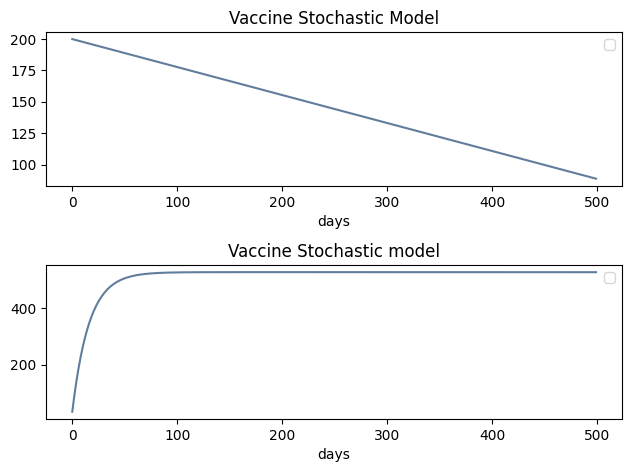

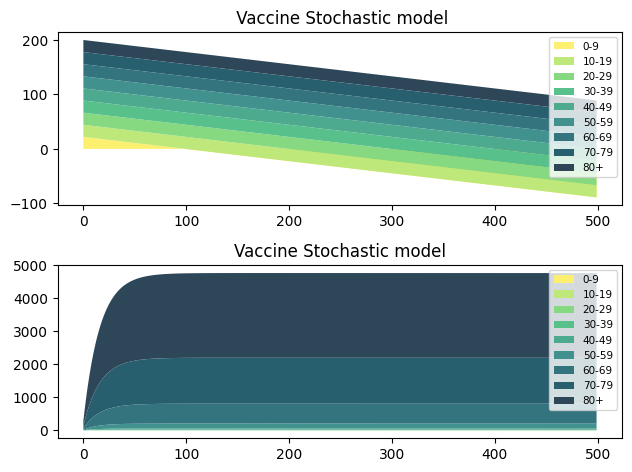

In [14]:
# Figure 3
plt.figure()
plt.subplot(2, 1, 1)
plt.title(f"Vaccine Stochastic Model")
plt.xlabel("days")
# plt.ylabel("deterministic model infected population trajectory")
color_map = [(97, 125, 156), (203, 125, 107), (226, 201, 157), (157, 117, 168)]
hex_map = ['#%02x%02x%02x' % (rgb_code[0], rgb_code[1], rgb_code[2]) for rgb_code in color_map]
plt.plot(vax_Tophistory[0], color=hex_map[0])
# plt.plot(vax_Tophistory[1], color=hex_map[1])
# plt.plot(vax_Tophistory[2], color=hex_map[2])
# plt.plot(vax_Tophistory[3], color=hex_map[3])
plt.legend()
plt.subplot(2, 1, 2)
plt.title(f"Vaccine Stochastic model")
plt.xlabel("days")
# plt.ylabel("deterministic model infected population trajectory")

plt.plot(vax_Bottomhistory[0], color=hex_map[0])
# plt.plot(vax_Bottomhistory[1], color=hex_map[1])
# plt.plot(vax_Bottomhistory[2], color=hex_map[2])
# plt.plot(vax_Bottomhistory[3], color=hex_map[3])
plt.tight_layout(pad=1.0)
plt.legend()
plt.show()

# Figure 8

vax_fig8Tophistory, vax_fig8Bottomhistory = vax_fig8Tophistory[0], vax_fig8Bottomhistory[0]
vax_topvstack = []
vax_bottomvstack = []
for i in range(len(vax_fig8Tophistory[0])):
    vax_topvstack.append([arr[i] for arr in vax_fig8Tophistory])
for i in range(len(vax_fig8Bottomhistory[0])):
    vax_bottomvstack.append([arr[i] for arr in vax_fig8Bottomhistory])

lbls = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
color_map = [(253, 239, 111), (191, 232, 122), (134, 217, 128), (88, 192, 138), (77, 170, 143), (65, 145, 143),
                (51, 116, 127), (40, 95, 111), (45, 71, 89)]
hex_map = ['#%02x%02x%02x' % (rgb_code[0], rgb_code[1], rgb_code[2]) for rgb_code in color_map]
plt.figure()
plt.subplot(2, 1, 1)
plt.title(f" Vaccine Stochastic model")
plt.stackplot(np.linspace(0, len(vax_fig8Tophistory) - 1, len(vax_fig8Tophistory)), vax_topvstack[0], vax_topvstack[1],
                vax_topvstack[2],
                vax_topvstack[3], vax_topvstack[4], vax_topvstack[5], vax_topvstack[6], vax_topvstack[7],
                vax_topvstack[8], labels=lbls,
                colors=hex_map)
plt.legend(fontsize=7.5)
plt.subplot(2, 1, 2)
plt.title(f"Vaccine Stochastic model")
plt.stackplot(np.linspace(0, len(vax_fig8Bottomhistory) - 1, len(vax_fig8Bottomhistory)), vax_bottomvstack[0],
                vax_bottomvstack[1],
                vax_bottomvstack[2], vax_bottomvstack[3], vax_bottomvstack[4], vax_bottomvstack[5], vax_bottomvstack[6],
                vax_bottomvstack[7],
                vax_bottomvstack[8], labels=lbls, colors=hex_map)
plt.legend(fontsize=7.5)
plt.tight_layout(pad=1.0)
plt.show()